In [1]:
import sys
sys.path.append('D:\\Git\\machine-learning')

# Test

(-1.1, 1.5)

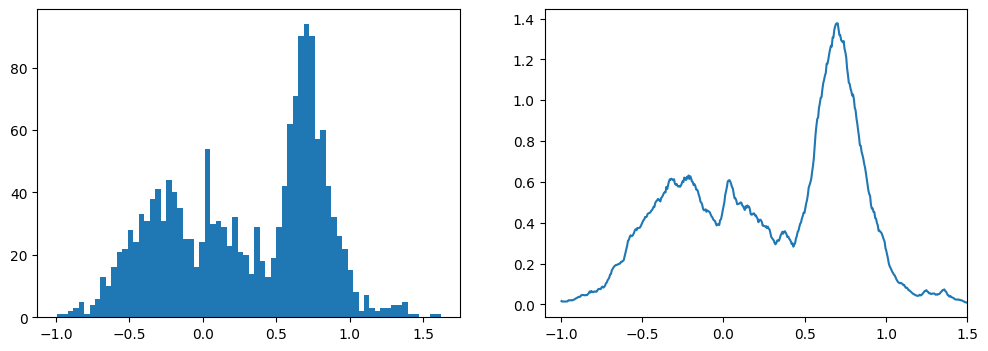

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mltools.distribution import NormalDistribution
from mltools.generative import EstimatePDF

# Create random real-world distribution
x1 = np.random.rand(500)
x2 = np.random.normal(0.7, 0.09, 430)
x3 = np.random.normal(-0.27, 0.25, 620)
x4 = np.random.normal(1,0.25,100)

x = np.concatenate([x1,x2,x3,x4])

pdf_x, pdf_y = EstimatePDF().smooth_pdf(x, 500)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(x,bins=70);
ax[1].plot(pdf_x, pdf_y)
ax[1].set_xlim(-1.1,1.5)

Plotting normal distribution along the PDF estimate

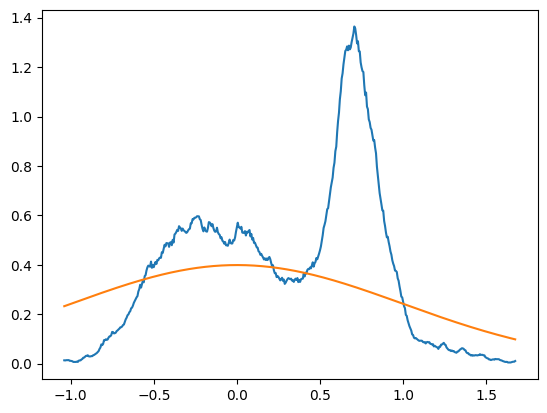

In [9]:
axis = np.linspace(-4, 2, 500)
pdf_norm = NormalDistribution(0, 1).pdf(pdf_x)

plt.plot(pdf_x, pdf_y)
plt.plot(pdf_x, pdf_norm)

In [10]:
# Max value of pdf_x where pdf_y > pdf_norm
pdf_max = np.max(pdf_y[pdf_y > pdf_norm])

max_idx = np.where(pdf_y == pdf_max)[0][0]

multiplier = pdf_y[max_idx] / pdf_norm[max_idx]

multiplier

4.387821355345154

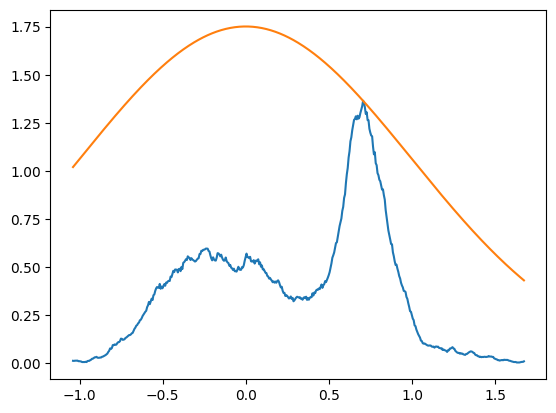

In [12]:
pdf_norm_2 = NormalDistribution(0, 2).pdf(pdf_x)

plt.plot(pdf_x, pdf_y)
plt.plot(pdf_x, pdf_norm * multiplier)

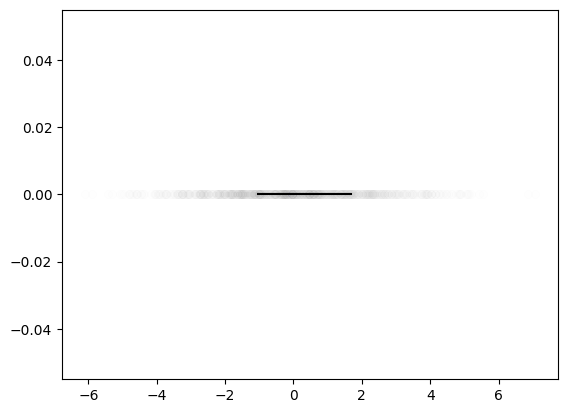

In [13]:
norm = NormalDistribution(0, 1)
samples = norm.sample(1000) * 2

plt.plot(pdf_x, np.zeros(len(pdf_x)), c='black')
plt.scatter(samples, np.zeros(1000), alpha=0.005)


(-4.0, 2.0)

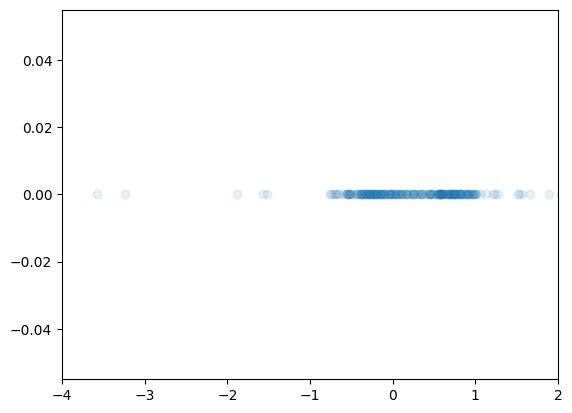

In [14]:
def find_closest(array, number):
    array = np.asarray(array)
    idx = (np.abs(array - number)).argmin()
    return idx

accepted = []
for sample in samples:
    idx = find_closest(pdf_x, sample)
    accept_proba = pdf_y[idx] / (2 * pdf_norm[idx])
    if np.random.rand() < accept_proba:
        accepted.append(sample)

plt.scatter(accepted, np.zeros(len(accepted)), alpha=0.1)
plt.xlim(-4, 2)

In [12]:
len(accepted)

265

(-1.2, 1.5)

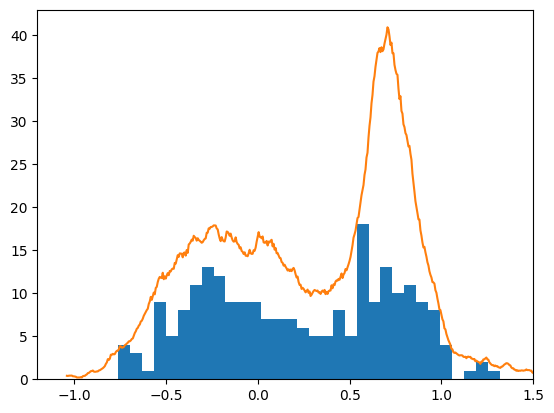

In [15]:
plt.hist(accepted, bins=150);
plt.plot(pdf_x, pdf_y*30)
plt.xlim(-1.2, 1.5)

# Result

(-1.1, 1.5)

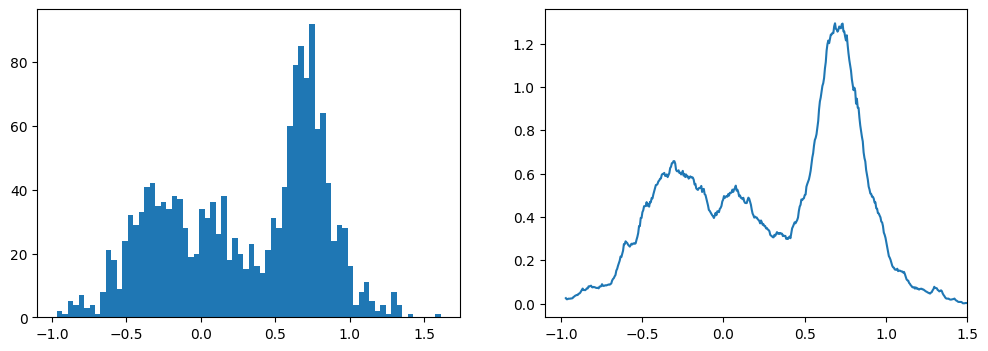

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mltools.distribution import NormalDistribution
from mltools.generative import EstimatePDF

# Create random real-world distribution
x1 = np.random.rand(500)
x2 = np.random.normal(0.7, 0.09, 430)
x3 = np.random.normal(-0.27, 0.25, 620)
x4 = np.random.normal(1,0.25,100)

x = np.concatenate([x1,x2,x3,x4])

pdf_x, pdf_y = EstimatePDF().smooth_pdf(x, 500)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(x,bins=70);
ax[1].plot(pdf_x, pdf_y)
ax[1].set_xlim(-1.1,1.5)

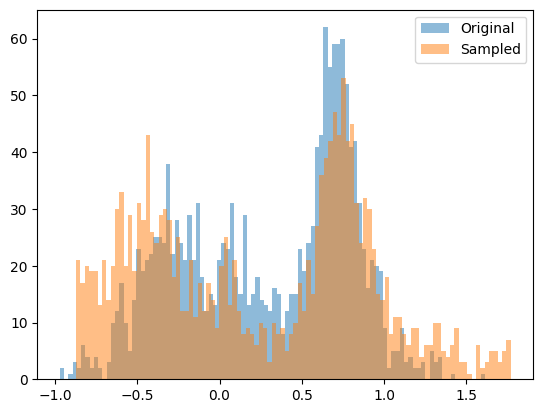

In [18]:
from mltools.generative import RejectionSampling

rs = RejectionSampling()
samples = rs.sample(x, 1650, 1000)
plt.hist(x, bins=100, alpha=0.5, label='Original');
plt.hist(samples, bins=100, alpha=0.5, label='Sampled');
plt.legend();
#plt.xlim(-1.55, 1.8)